# Bandit Problems

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
# there are 4 slot machines, the means and standard deviations of their payoffs are listed below

means = np.array([1,2,3,4])
stds = np.array([1,2,3,4])
narms = len(means)
npull = 500



In [3]:
# we know what's best: pulling arm 4 repeatedly...let's see what happens if we do this?

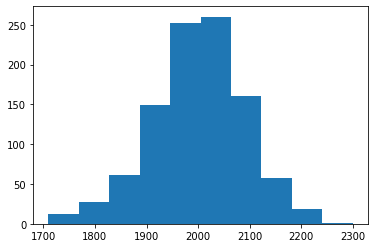

In [6]:
nsim = 1000
simvec = np.zeros(1000)
for sim in range(nsim):
    payoffs = np.random.normal(size=npull,loc=4,scale=4)
    simvec[sim] = np.sum(payoffs)

np.mean(simvec)
plt.hist(simvec);

In [ ]:
# when we don't know the payoff distributions we don't know to pull 4 repeatedly
# we must learn which arm is bets
# but we shouldn't expect to do better than when we do know the distribution!

In [8]:
def tot_return_fun_eps_greedy(epsilon,npulls):
    avg_so_far = np.zeros(narms)
    pulls_per_arm = np.zeros(narms)
    tot_return = 0
    for pull in range(npulls):
        if np.random.random() < epsilon:
            this_choice = np.random.choice(narms)
        else:
            this_choice = np.argmax(avg_so_far)

        payout = np.random.normal(loc=means[this_choice],scale = stds[this_choice])
        avg_so_far[this_choice] *= pulls_per_arm[this_choice]
        avg_so_far[this_choice] += payout
        pulls_per_arm[this_choice] += 1
        avg_so_far[this_choice] /= pulls_per_arm[this_choice]
        tot_return += payout
    return tot_return

In [9]:
tot_return_fun_eps_greedy(0.1,npull)

1734.4824161660624

In [10]:
eps_vec = np.array([0.01,0.02,0.05,0.075,0.1,0.15,0.25,0.5])
ne = len(eps_vec)
nsim = 1000

In [15]:
payout_vec = np.zeros(ne)
for i,e in enumerate(tqdm(eps_vec)):
    # print(i)
    simvec = np.zeros(nsim)
    for s in range(nsim):
        simvec[s] = tot_return_fun_eps_greedy(e,npull)
    payout_vec[i] = np.mean(simvec)
    


8it [00:29,  3.71s/it]


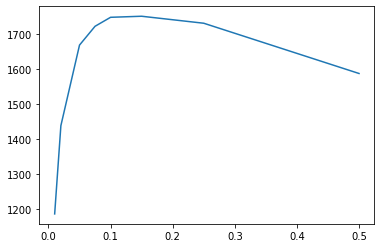

In [12]:
plt.plot(eps_vec,payout_vec);

In [13]:
eps_vec[np.argmax(payout_vec)]

0.15

In [16]:
# optimistic
def tot_return_fun_optimistic(start,npulls):
    avg_so_far = np.ones(narms)*start
    pulls_per_arm = np.ones(narms)
    tot_return = 0
    for pull in range(npulls):
        this_choice = np.argmax(avg_so_far)
        payout = np.random.normal(loc=means[this_choice],scale = stds[this_choice])
        avg_so_far[this_choice] *= pulls_per_arm[this_choice]
        avg_so_far[this_choice] += payout
        pulls_per_arm[this_choice] += 1
        avg_so_far[this_choice] /= pulls_per_arm[this_choice]
        tot_return += payout
    return tot_return

In [17]:
tot_return_fun_optimistic(40,npull)

1702.8668349441862

In [38]:
start_vec = [10,15,20,25,50,100]
start_vec = [i for i in range(5,100,5)]
ns = len(start_vec)

In [39]:
payout_vec_optimistic = np.zeros(ns)
for i,e in enumerate(tqdm(start_vec)):
    # print(i)
    simvec = np.zeros(nsim)
    for s in range(nsim):
        simvec[s] = tot_return_fun_optimistic(e,npull)
    payout_vec_optimistic[i] = np.mean(simvec)

100%|██████████| 19/19 [00:55<00:00,  2.91s/it]


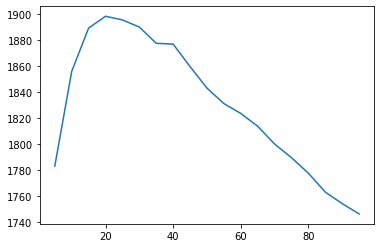

In [40]:
plt.plot(start_vec,payout_vec_optimistic);

In [41]:
start_vec[np.argmax(payout_vec_optimistic)]

20

## There was a suggestion in class on Tuesday to let the high/low averages determine a probability of choosing which arm to pull; this is called policy gradients.  the book discusses policy gradients in some detail in chapter 2 with some complicated math.  A common and simple variation of this is to just use the softmax function on the running average vector to determine the probabilities of pulling arms!

## We'll do something similar when we get to RL

In [29]:
def dans_softmax(vec):
    vec -= np.max(vec) # this step is not strictly required but solves some numerical issues when there are large entries
    vec = np.exp(vec)
    vec /= np.sum(vec)
    return vec

In [30]:
# kinda policy gradients
def tot_return_fun_pg(npulls):
    avg_so_far = np.zeros(narms)
    pulls_per_arm = np.ones(narms)
    tot_return = 0
    for pull in range(npulls):
        this_choice = np.random.choice(narms,p=dans_softmax(avg_so_far))
        payout = np.random.normal(loc=means[this_choice],scale = stds[this_choice])
        avg_so_far[this_choice] *= pulls_per_arm[this_choice]
        avg_so_far[this_choice] += payout
        pulls_per_arm[this_choice] += 1
        avg_so_far[this_choice] /= pulls_per_arm[this_choice]
        tot_return += payout
    return tot_return

In [31]:
tot_return_fun_pg(500)

2088.650590747777

In [32]:
simvec = np.zeros(nsim)
for s in tqdm(range(nsim)):
    simvec[s] = tot_return_fun_pg(npull)
np.mean(simvec)

100%|██████████| 1000/1000 [00:18<00:00, 53.89it/s]


1625.811455721774

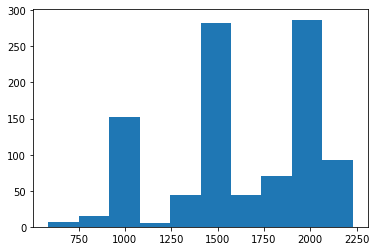

In [37]:
plt.hist(simvec);